In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

np.set_printoptions(threshold=np.inf)

In [212]:
address = pd.read_csv('/Users/lucaswagar/Documents/Datasets/owner_address.csv', dtype = {'folio' : str} )
sales = pd.read_csv('/Users/lucaswagar/Documents/Datasets/sales.csv')

In [213]:
sales.head()

,strap,deedNum,Tdate,sales_cd,deed_type,price,status_cd
0,M2000001,7P193092,9/13/1999 12:00:00 AM,Q,TN,66000.00,A
1,M2000001,7P544958,9/13/1999 12:00:00 AM,U,NC,0.00,A
2,M2000001,3616937,9/27/2017 12:00:00 AM,Q,VT,95000.00,A
3,M2000002,7P197496,10/13/1999 12:00:00 AM,Q,TN,50900.00,A
4,M2000002,3157017,1/15/2010 12:00:00 AM,Q,VT,30000.00,A


In [214]:
address.head()

,CreatedDate,strap,folio,status_cd,bld_num,str_num,str_pfx,str,str_sfx,str_unit,city,sub_code,sub_dscr,section,township,range,block,lot,owner_name,mail_to,mailingAddr1,mailingAddr2,mailingCity,mailingState,mailingZip,mailingCountry,role_cd,pct_own,taxArea,nh,mill_levy,legalDscr,waterFee,account_type
0,2/11/2025 4:01:03 AM,M2000001,146318113001,A,0.00,4500.00,NaN,19TH,ST,119,BOULDER,1841.00,COUNTRYSIDE VILLAGE BOULDER - MHP BOV,18.00,1N,70.00,,,BRETADO-SEGOVIA NORATO SERGIO,NaN,4500 19TH ST 119,NaN,BOULDER,CO,80304,NaN,P,1.00,10,122.00,87.88,119 COUNTRYSIDE VILLAGE BO MHP 99 LEX 60X28 2...,NaN,MANUFACTURED HOME
1,2/11/2025 4:01:03 AM,M2000002,146318113001,A,0.00,4500.00,NaN,19TH,ST,113,BOULDER,1841.00,COUNTRYSIDE VILLAGE BOULDER - MHP BOV,18.00,1N,70.00,,,LASTERI CLAUDIA KELLEY & NOEMI LASTIRI LOPEZ,NaN,4500 19TH ST 113,NaN,BOULDER,CO,80304,NaN,P,1.00,10,122.00,87.88,113 COUNTRYSIDE VILLAGE BO MHP 98 PRE 80X16 GD...,NaN,MANUFACTURED HOME
2,2/11/2025 4:01:03 AM,M2000003,146321300001,A,0.00,5000.00,NaN,BUTTE,ST,185,BOULDER,8464.00,VISTA VILLAGE - MHP BOV,21.00,1N,70.00,,,KRAUSE CLARINDA L,NaN,5000 BUTTE ST 185,NaN,BOULDER,CO,80301,NaN,P,1.00,10,135.00,87.88,185 VISTA VILLAGE MHP 99 CHA 58X16 4990 22993...,NaN,MANUFACTURED HOME
3,2/11/2025 4:01:03 AM,M2000004,146318113001,A,0.00,4500.00,NaN,19TH,ST,257,BOULDER,1841.00,COUNTRYSIDE VILLAGE BOULDER - MHP BOV,18.00,1N,70.00,,,COUNTRYSIDE VILLAGE ASSOCS/BOULDER LTD PARTNER...,C/O UNIPROP INC,280 DAINES ST SUITE 300,NaN,BIRMINGHAM,MI,48009-6250,NaN,P,1.00,10,122.00,87.88,257 COUNTRYSIDE VILLAGE BO MHP 99 SKYLINE 44X2...,NaN,MANUFACTURED HOME
4,2/11/2025 4:01:03 AM,M2000007,146318113001,A,0.00,4500.00,NaN,19TH,ST,214,BOULDER,1841.00,COUNTRYSIDE VILLAGE BOULDER - MHP BOV,18.00,1N,70.00,,,LOPEZ ABRAHAM & ISABEL ARGUMEDO,NaN,4500 19TH ST 214,NaN,BOULDER,CO,80304,NaN,P,1.00,10,122.00,87.88,214 COUNTRYSIDE VILLAGE BO MHP AKA BOULDER MEA...,NaN,MANUFACTURED HOME


In [215]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728040 entries, 0 to 728039
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   strap      728040 non-null  object 
 1   deedNum    727886 non-null  object 
 2   Tdate      728040 non-null  object 
 3   sales_cd   728040 non-null  object 
 4   deed_type  728039 non-null  object 
 5   price      718054 non-null  float64
 6   status_cd  728040 non-null  object 
dtypes: float64(1), object(6)
memory usage: 38.9+ MB


In [216]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151329 entries, 0 to 151328
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CreatedDate     151329 non-null  object 
 1   strap           151329 non-null  object 
 2   folio           151263 non-null  object 
 3   status_cd       151329 non-null  object 
 4   bld_num         151246 non-null  float64
 5   str_num         151246 non-null  float64
 6   str_pfx         15451 non-null   object 
 7   str             151238 non-null  object 
 8   str_sfx         146444 non-null  object 
 9   str_unit        22875 non-null   object 
 10  city            151246 non-null  object 
 11  sub_code        151328 non-null  float64
 12  sub_dscr        151328 non-null  object 
 13  section         151203 non-null  float64
 14  township        151203 non-null  object 
 15  range           151203 non-null  float64
 16  block           151329 non-null  object 
 17  lot       

In [217]:
sales_merge = sales.merge(address, how = 'left', on = 'strap')
sales_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821765 entries, 0 to 821764
Data columns (total 40 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   strap           821765 non-null  object 
 1   deedNum         821486 non-null  object 
 2   Tdate           821765 non-null  object 
 3   sales_cd        821765 non-null  object 
 4   deed_type       821764 non-null  object 
 5   price           810811 non-null  float64
 6   status_cd_x     821765 non-null  object 
 7   CreatedDate     821197 non-null  object 
 8   folio           821197 non-null  object 
 9   status_cd_y     821197 non-null  object 
 10  bld_num         821196 non-null  float64
 11  str_num         821196 non-null  float64
 12  str_pfx         81534 non-null   object 
 13  str             821196 non-null  object 
 14  str_sfx         799834 non-null  object 
 15  str_unit        132614 non-null  object 
 16  city            821196 non-null  object 
 17  sub_code  

In [218]:
sales_filter = sales_merge[['strap','Tdate','price','city','account_type']]
sales_filter = sales_filter[sales_filter['price'] != 0]
sales_filter = sales_filter.loc[sales_filter['account_type'].isin(['MANUFACTURED HOME', 'RESIDENTIAL CONDO', 'RESIDENTIAL', 'APARTMENT'])]
sales_filter['city'].unique()

array(['BOULDER', 'LOUISVILLE', 'LAFAYETTE', 'LONGMONT', 'UNINCORPORATED',
       'NEDERLAND', 'BOULDER ', 'LYONS', 'ERIE', 'JAMESTOWN', 'SUPERIOR',
       'WARD'], dtype=object)

In [219]:
sales_filter.loc[sales_filter['city'] == 'BOULDER ', 'city'] = 'BOULDER'
sales_filter['city'].unique()

array(['BOULDER', 'LOUISVILLE', 'LAFAYETTE', 'LONGMONT', 'UNINCORPORATED',
       'NEDERLAND', 'LYONS', 'ERIE', 'JAMESTOWN', 'SUPERIOR', 'WARD'],
      dtype=object)

In [220]:
sales_clean = sales_filter.dropna().copy()
sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386305 entries, 0 to 821764
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   strap         386305 non-null  object 
 1   Tdate         386305 non-null  object 
 2   price         386305 non-null  float64
 3   city          386305 non-null  object 
 4   account_type  386305 non-null  object 
dtypes: float64(1), object(4)
memory usage: 17.7+ MB


In [221]:
sales_clean.loc[:, 'Tdate'] = pd.to_datetime(sales_clean['Tdate'])
sales_clean['sale_year'] = pd.DatetimeIndex(sales_clean['Tdate']).year
sales_clean['sale_month'] = pd.DatetimeIndex(sales_clean['Tdate']).month
sales_clean.info()

/var/folders/_3/wf7zkn0x6pv52x99wzzkv_xh0000gn/T/ipykernel_10949/1797461451.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_clean.loc[:, 'Tdate'] = pd.to_datetime(sales_clean['Tdate'])


<class 'pandas.core.frame.DataFrame'>
Index: 386305 entries, 0 to 821764
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   strap         386305 non-null  object 
 1   Tdate         386305 non-null  object 
 2   price         386305 non-null  float64
 3   city          386305 non-null  object 
 4   account_type  386305 non-null  object 
 5   sale_year     386305 non-null  int32  
 6   sale_month    386305 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 20.6+ MB


In [231]:
cities_sales = sales_clean.loc[(sales_clean['city'].isin(['BOULDER', 'LOUISVILLE', 'LAFAYETTE', 'LONGMONT'])) & (sales_clean['sale_year'] >= 1974) & (sales_clean['sale_year'] <= 2024)].copy()
cities_sales_median = cities_sales.groupby(['city','sale_year']).agg({'price' : ['median']})

Text(0.5, 1.0, 'Medain Residental Sales Price Boulder County')

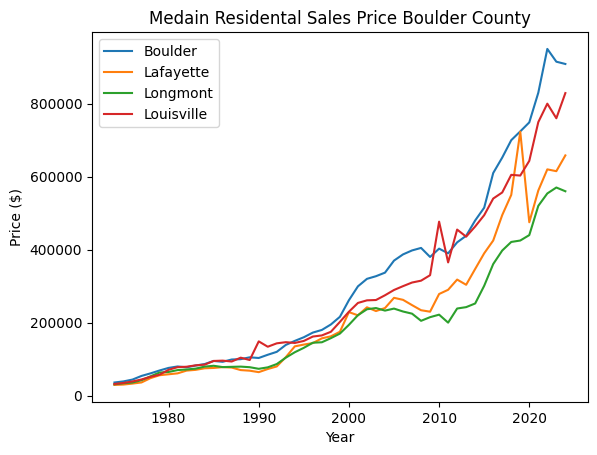

In [259]:
cities_sales_median.unstack(level=0).plot()
plt.legend(['Boulder', 'Lafayette', 'Longmont', 'Louisville'])
plt.ylabel('Price ($)')
plt.xlabel('Year')
plt.title('Medain Residental Sales Price Boulder County')

Text(0.5, 1.0, 'Medain Residental Sales Price Boulder County')

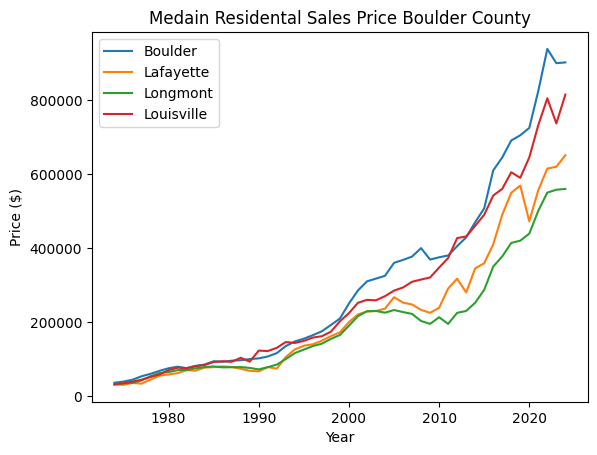

In [258]:
cities_sales['zscore'] = cities_sales.groupby(['city','sale_year'])['price'].transform(lambda x : (x - x.mean()) / x.std())
zscore_sales = cities_sales[(cities_sales['zscore'] <= 1) & (cities_sales['zscore'] >= -1)]
zscore_sales_median = zscore_sales.groupby(['city', 'sale_year']).agg({'price' : 'median'})
zscore_sales_median.unstack(level=0).plot()
plt.legend(['Boulder', 'Lafayette', 'Longmont', 'Louisville'])
plt.ylabel('Price ($)')
plt.xlabel('Year')
plt.title('Medain Residental Sales Price Boulder County')